### Read data from datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
books = pd.read_csv('Books.csv', sep=',', encoding='latin-1')
books.columns=['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher', 'ImageURLS', 'ImageURLM', 'ImageURLL']
users = pd.read_csv('Users.csv', sep=',', encoding='latin-1')
users.columns=['UserID', 'Location', 'Age']
ratings = pd.read_csv('Ratings.csv', sep=',', encoding='latin-1')
ratings.columns=['UserID', 'ISBN', 'BookRating']

C:\Users\HP\AppData\Local\Temp\ipykernel_27548\2608782307.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv', sep=',', encoding='latin-1')


In [4]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['UserID', 'ISBN', 'BookRating']


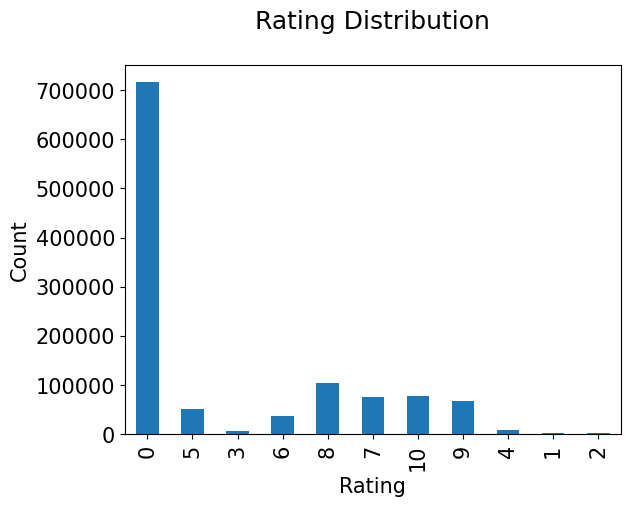

In [5]:
plt.rc('font', size=15)
ratings.BookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [6]:
print(books.shape)
print(list(books.columns))

(271360, 8)
['ISBN', 'BookTitle', 'BookAuthor', 'YearOfPublication', 'Publisher', 'ImageURLS', 'ImageURLM', 'ImageURLL']


In [7]:
print(users.shape)
print(list(users.columns))

(278858, 3)
['UserID', 'Location', 'Age']


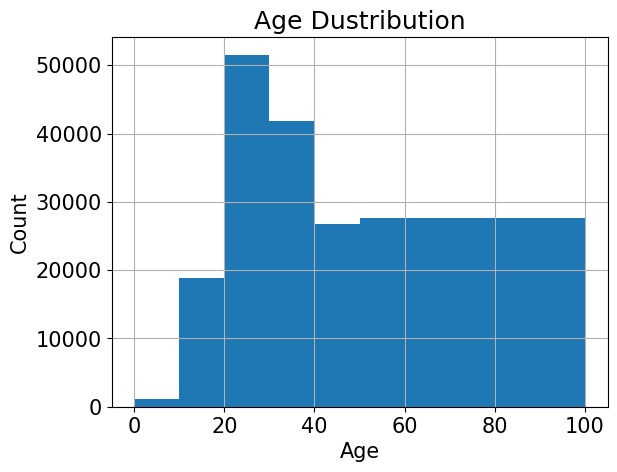

In [8]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Dustribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

In [14]:
books_df = pd.DataFrame(books[['ISBN', 'BookTitle', 'BookAuthor']])
ratings_df = pd.DataFrame(ratings[['UserID', 'ISBN', 'BookRating']])
ratings_df = pd.merge(books_df, ratings_df, on='ISBN')
ratings_df.head()

,ISBN,BookTitle,BookAuthor,UserID,BookRating
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,41385,0


### Recommendation based on Rating Count

In [30]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['BookRating'].count())
rating_count.sort_values('BookRating', ascending=False).head()

,BookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [31]:
most_rated_book = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns=['ISBN'])
most_rated_book_summary = pd.merge(most_rated_book, books, on='ISBN')
most_rated_book_summary

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


### Recommendation based on correlation

In [17]:
ratings_df.head()

,ISBN,BookTitle,BookAuthor,UserID,BookRating
0,0195153448,Classical Mythology,Mark P. O. Morford,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,41385,0


In [32]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['BookRating'].mean())
average_rating['RatingCount'] = pd.DataFrame(ratings.groupby('ISBN')['BookRating'].count())
average_rating.sort_values('RatingCount', ascending=False).head(20)

,BookRating,RatingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723
044023722X,3.187017,647
0142001740,4.219512,615
067976402X,3.255700,614
0671027360,3.718430,586


Observation: in this data set, the book that received most number of ratings was not highly rated at all.

### For statistical significance, users with less than 200 ratings and books with less than 100 ratings are excluded

In [34]:
counts_user = ratings['UserID'].value_counts()
ratings = ratings[ratings['UserID'].isin(counts_user[counts_user>=200].index)]
counts_book = ratings['BookRating'].value_counts()
ratings = ratings[ratings['BookRating'].isin(counts_book[counts_book>=100].index)]

#### Rating Matrix

Convert the data into a 2D matrix

In [25]:
average_rating.head()

,ISBN,BookRating,RatingCount,BookTitle,BookAuthor,UserID
0,0000913154,8.0,1,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),171118
1,0001010565,0.0,1,Mog's Christmas,Judith Kerr,86123
2,0001010565,0.0,1,Mog's Christmas,Judith Kerr,209516
3,0001046438,9.0,1,Liar,Stephen Fry,23902
4,000104687X,6.0,1,"T.S. Eliot Reading \The Wasteland\"" and Other ...",T.S. Eliot,23902


In [35]:
ratings_pivot = ratings.pivot(index='UserID', columns='ISBN').BookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot

(816, 173450)


ISBN,0000913154,0001010565,0001046438,000104687X,0001047213,0001047663,0001047868,0001047973,000104799X,0001048082,...,B0001FZGRQ,B0001FZGTO,B0001GDNCK,B0001GMSV2,B0001I1JII,B0001I1KOG,B0001PIOX4,B000234N3A,B000234N76,B000234NC6
UserID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
ratings_df[ratings_df['ISBN']=='0000913154']

,ISBN,BookTitle,BookAuthor,UserID,BookRating
1013651,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),171118,8


In [36]:
book1_rating = ratings_pivot['0316666343']
similar_to_book1 = ratings_pivot.corrwith(book1_rating)
corr_book1 = pd.DataFrame(similar_to_book1, columns=['pearsonR'])
corr_book1.dropna(inplace=True)
corr_summary = corr_book1.join(average_rating['RatingCount'])
corr_summary[corr_summary['RatingCount']>=300].sort_values('pearsonR', ascending=False).head(10)

C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\HP\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,pearsonR,RatingCount
ISBN,,
0316666343,1.000000,1295
0312291639,0.471872,354
0316601950,0.431408,568
0446610038,0.429712,391
0446672211,0.417742,585
0385265700,0.351635,319
0345342968,0.316922,321
0060930535,0.309860,494
0375707972,0.308145,354


In [ ]:
books_corr_with_book1 = pd.DataFrame(['0001944711', '0002005018', '0002250810', '000225929X', '0006177492'], index=np.arange(5), columns=['ISBN'])
corr_books = pd.merge(books_corr_with_book1, books, on='ISBN')
corr_books